In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os

# List all files in the Kaggle input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/nlp-mental-health-conversations/train.csv")

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset statistics
print("\nDataset description:")
print(df.describe())

# Display dataset info
print("\nDataset info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop missing values and update the DataFrame
df.dropna(inplace=True)

print("\nAfter dropping missing values:")
print(df.isnull().sum())

print(df['Response'].dtype)
print(df['Response'].head())
print(df['Response'].apply(type).value_counts())


def clean_text(text):
    return re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)


df['Context'] = df['Context'].apply(clean_text)
df['Response'] = df['Response'].apply(clean_text)


/kaggle/input/nlp-mental-health-conversations/train.csv
First 5 rows of the dataset:
                                             Context  \
0  I'm going through some things with my feelings...   
1  I'm going through some things with my feelings...   
2  I'm going through some things with my feelings...   
3  I'm going through some things with my feelings...   
4  I'm going through some things with my feelings...   

                                            Response  
0  If everyone thinks you're worthless, then mayb...  
1  Hello, and thank you for your question and see...  
2  First thing I'd suggest is getting the sleep y...  
3  Therapy is essential for those that are feelin...  
4  I first want to let you know that you are not ...  

Dataset description:
                                                  Context  \
count                                                3512   
unique                                                995   
top     I have so many issues to address. I

       Context_length  Response_length
count     3508.000000      3508.000000
mean       280.117161      1019.235177
std        244.034843       979.249012
min         25.000000         1.000000
25%        142.000000       530.000000
50%        230.000000       828.500000
75%        346.000000      1262.000000
max       2671.000000     31485.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


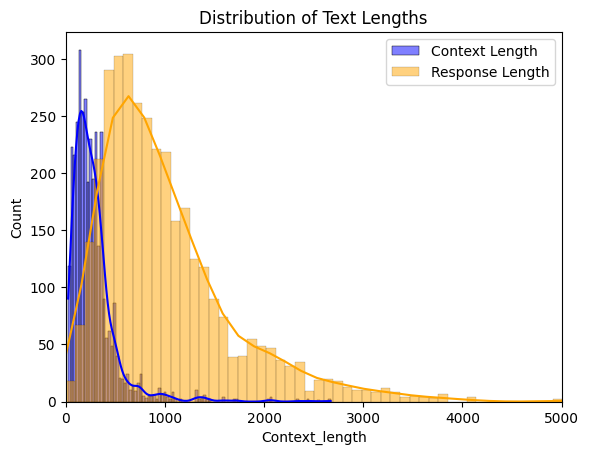

In [2]:
df['Context_length'] = df['Context'].apply(len)
df['Response_length'] = df['Response'].apply(len)

# Summary statistics
print(df[['Context_length', 'Response_length']].describe())

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Context_length'], kde=True, color='blue', label='Context Length')
sns.histplot(df['Response_length'], kde=True, color='orange', label='Response Length')
plt.legend()
plt.xlim(0, 5000)#limited the text lenth till 5000
plt.title('Distribution of Text Lengths')
plt.show()


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)#this eleminates most common words in english kike is and and 
context_ngrams = vectorizer.fit_transform(df['Context'])#unique words are collected from the sentences used here
print("Most common words in Context:")
print(vectorizer.get_feature_names_out())

response_ngrams = vectorizer.fit_transform(df['Response'])
print("Most common words in Response:")
print(vectorizer.get_feature_names_out())


Most common words in Context:
['anxiety' 'counseling' 'dont' 'feel' 'help' 'im' 'ive' 'just' 'know'
 'life' 'like' 'love' 'people' 'really' 'relationship' 'things' 'think'
 'time' 'want' 'years']
Most common words in Response:
['dont' 'feel' 'feeling' 'good' 'help' 'know' 'life' 'like' 'make' 'need'
 'people' 'person' 'relationship' 'therapist' 'things' 'time' 'want' 'way'
 'work' 'youre']
